# Python Project

**Hotel**

The program must present and display a report of the result obtained, showing for
each strategy the number of customers accommodated, the number of rooms occupied, the
number of different hotels occupied, the total volume of business (total earnings of each
hotel), and the degree of customer satisfaction (calculated according to the location of the
hotel assigned to them with respect to their preferences).
I will use 4 differents strategies:
**1-random**
**2-customer preference**
**3-price**
**4-availability**

# Random:
customers are randomly distributed to the rooms until the seats or customers
are exhausted.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import necessary files
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
# Initialize columns and dictionaries
hotel_ex['stanze_disponibili'] = hotel_ex['rooms'].copy()
guadagni_hotel = {hotel: 0 for hotel in hotel_ex['hotel']}
# Import stats function
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
# Iterate through each guest
for _, guest_row in guest_ex.iterrows():
    guest = guest_row['guest']
    discount = guest_row['discount']
    
    # Check available hotels
    hotels_disponibili = hotel_ex[hotel_ex['stanze_disponibili'] > 0]
    if hotels_disponibili.empty:
        print('Non ci sono hotel disponibili')
        continue

    # Select a random hotel from the available ones
    hotel_selezionato = np.random.choice(hotels_disponibili['hotel'])

    # Check if the selected hotel is among guest's preferences
    preferenze_ospite = preferences_ex[preferences_ex['guest'] == guest]
    if hotel_selezionato in preferenze_ospite['hotel'].values:
        ospiti_soddisfatti += 1
    
    # Calculate the final price with discount
    prezzo_hotel = hotel_ex[hotel_ex['hotel'] == hotel_selezionato].iloc[0]
    price = prezzo_hotel['price']
    prezzo_finale = price * (1 - discount)
    
    # Store the allocation details
    allocazioni.append({
        'cliente': guest,
        'hotel_f': hotel_selezionato,
        'prezzo_pagato': prezzo_finale
    })
    
    # Update the available rooms and earnings for the selected hotel
    indice_hotel = hotel_ex[hotel_ex['hotel'] == hotel_selezionato].index
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -= 1
    
    # Update stats after allocation
    ospiti_allocati += 1
    stanze_occupate += 1
    hotel_occupati.add(hotel_selezionato)
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    
# Create DataFrames for final allocations and earnings
allocazioni_df = pd.DataFrame(allocazioni)
numero_hotel_occupati = len(hotel_occupati)
guadagni_df = pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno Totale'])
# Print the final statistics
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Ospiti soddisfatti: {ospiti_soddisfatti}')
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df)

Numero di ospiti che hanno ottenuto una camera: 4000
Numero di stanze occupate: 4000
Numero di hotel occupati: 400
Ospiti soddisfatti: 245

Guadagni totali di ogni hotel:
         Hotel  Guadagno Totale
0      hotel_1          3319.68
1      hotel_2           831.68
2      hotel_3          1273.23
3      hotel_4          1529.18
4      hotel_5          1901.24
..         ...              ...
395  hotel_396           994.28
396  hotel_397           716.04
397  hotel_398          1314.78
398  hotel_399          4220.24
399  hotel_400          1877.75

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1  hotel_263         236.60
1        guest_2  hotel_284         231.00
2        guest_3  hotel_184         277.14
3        guest_4   hotel_95         293.00
4        guest_5   hotel_87         239.40
...          ...        ...            ...
3995  guest_3996  hotel_378         194.00
3996  guest_3997   hotel_12         190.40
3997  g

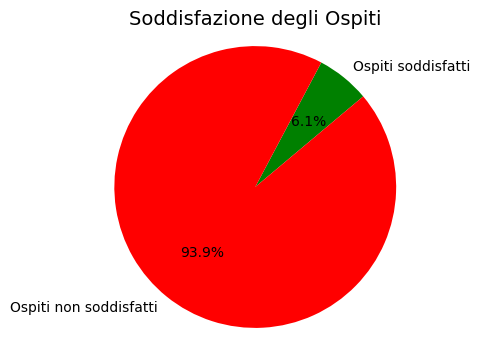

In [2]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
sizes = [ospiti_soddisfatti, 4000-ospiti_soddisfatti]
colors = ['green', 'red']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
plt.title('Soddisfazione degli Ospiti', fontsize=14)
plt.axis('equal')  
plt.show()
# creating a plot that shows how many guest were satisfied accordin to their preferences
#.figure create the figure considering the size that i choose
#.axis to have the circle
#.title the title of the graph
#.show just show the image


# Customer preference:
customers are served in order of reservation (the customer
number indicates the order) and are allocated to the hotel based on their preference,
until the seats or customers are exhausted.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
hotel_ex['stanze_disponibili']= hotel_ex['rooms'].copy()
guadagni_hotel= {hotel: 0 for hotel in hotel_ex['hotel']}
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
for _, guest_row in guest_ex.iterrows():
    guest=guest_row['guest']
    discount=guest_row['discount']
    preferenze_ospite= preferences_ex[preferences_ex['guest']==guest]
    hotels_preferiti= preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    #i'm creating a list where there are the hotel prefered by the guest and that has at least one room available
    if not hotels_preferiti.empty:
        hotel_selezionato= hotels_preferiti.iloc[0]['hotel']
        #if the list we created before is not empty with .iloc[0] we are choosing the name of the first hotel on the list
        ospiti_soddisfatti += 1  
    else:
        continue
    prezzo_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].iloc[0]
    price=prezzo_hotel['price']
    prezzo_finale= price*(1-discount)
    allocazioni.append({
        'cliente': guest,
        'hotel_f':hotel_selezionato,
        'prezzo_pagato':prezzo_finale
        })
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    hotel_ex.loc[indice_hotel, 'stanze_disponibili']-=1
    ospiti_allocati += 1
    stanze_occupate += 1
    hotel_occupati.add(hotel_selezionato)
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    if hotel_ex['stanze_disponibili'].sum() == 0:
        print('Tutte le stanze sono occupate.')
        break
allocazioni_df_2=pd.DataFrame(allocazioni)
guadagni_df_2= pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno totale'])
numero_hotel_occupati= len(hotel_occupati)
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Numero di ospiti soddisfatti: {ospiti_soddisfatti}')
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df_2)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df_2)

Numero di ospiti che hanno ottenuto una camera: 3975
Numero di stanze occupate: 3975
Numero di hotel occupati: 400
Numero di ospiti soddisfatti: 3975

Guadagni totali di ogni hotel:
         Hotel  Guadagno totale
0      hotel_1          3128.58
1      hotel_2          1207.96
2      hotel_3           816.39
3      hotel_4          2446.06
4      hotel_5          1904.22
..         ...              ...
395  hotel_396           949.76
396  hotel_397           690.20
397  hotel_398           944.52
398  hotel_399          1533.60
399  hotel_400           653.95

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1  hotel_168         271.18
1        guest_2  hotel_369         133.00
2        guest_3  hotel_157          60.45
3        guest_4  hotel_235         136.00
4        guest_5  hotel_121          50.40
...          ...        ...            ...
3970  guest_3996  hotel_350          56.00
3971  guest_3997   hotel_19          96

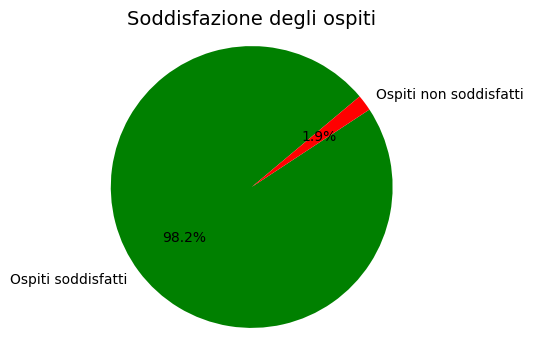

In [17]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
sizes = [ospiti_soddisfatti, 4000-ospiti_allocati]
colors = ['green', 'red']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
plt.title('Soddisfazione degli ospiti', fontsize=14)
plt.axis('equal')  
plt.show()

# Price:
the places in the hotel are distributed in order of price, starting with the cheapest
hotel and following in order of reservation and preference until the places or customers
are exhausted.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
hotel_ex['stanze_disponibili']=hotel_ex['rooms'].copy()
hotel_ex=hotel_ex.sort_values(by='price')
#i'm sorting the rows of hotel ex by price
guadagni_hotel= {hotel: 0 for hotel in hotel_ex['hotel']}
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
for _, guest_row in guest_ex.iterrows():
    guest=guest_row['guest']
    discount=guest_row['discount']
    preferenze_ospite = preferences_ex[preferences_ex['guest'] == guest]
    hotels_preferiti=preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    if not hotels_preferiti.empty:
        hotels_preferiti=hotels_preferiti.merge(hotel_ex[['hotel', 'price']], on='hotel').sort_values(by='price')
        #i'm combining hotel preferiti and hotel_ex on the colunm hotel which is in common and sorting by the price
        hotel_selezionato=hotels_preferiti.iloc[0]['hotel']
        if hotel_selezionato in preferenze_ospite['hotel'].values:
            ospiti_soddisfatti += 1
    else:
        continue
    prezzo_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].iloc[0]['price']
    prezzo_finale=prezzo_hotel*(1-discount)
    allocazioni.append({
        'cliente':guest,
        'hotel_f':hotel_selezionato,
        'prezzo_pagato':prezzo_finale
    })
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -=1
    ospiti_allocati+=1
    stanze_occupate+=1
    hotel_occupati.add(hotel_selezionato)
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    if hotel_ex['stanze_disponibili'].sum()==0:
        print('Stanze sold out')
        break
allocazioni_df_3 = pd.DataFrame(allocazioni)
guadagni_df_3=pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno Totale'])
numero_hotel_occupati= len(hotel_occupati)
print(f'Nuero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Numero di ospiti soddisfatti: {ospiti_soddisfatti}')
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df_3)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df_3)

Nuero di ospiti che hanno ottenuto una camera: 3926
Numero di stanze occupate: 3926
Numero di hotel occupati: 388
Numero di ospiti soddisfatti: 3926

Guadagni totali di ogni hotel:
         Hotel  Guadagno Totale
0    hotel_190           465.00
1     hotel_49           860.50
2    hotel_354           579.80
3    hotel_301           299.00
4     hotel_24           428.77
..         ...              ...
395  hotel_184             0.00
396    hotel_5             0.00
397  hotel_168           265.22
398  hotel_230             0.00
399   hotel_27           254.15

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1   hotel_22          55.51
1        guest_2   hotel_26          55.00
2        guest_3    hotel_6          53.94
3        guest_4  hotel_321          54.00
4        guest_5  hotel_121          50.40
...          ...        ...            ...
3921  guest_3996  hotel_115         244.00
3922  guest_3997  hotel_147         213.

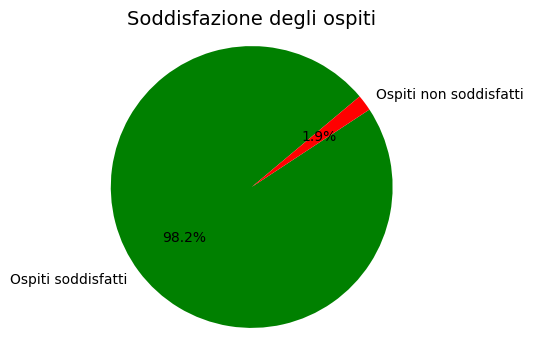

In [15]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
sizes = [ospiti_soddisfatti, 4000-ospiti_soddisfatti]
colors = ['green', 'red']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
plt.title('Soddisfazione degli ospiti', fontsize=14)
plt.axis('equal')  
plt.show()

# Availability:
places in hotels are distributed in order of room availability, starting with the
most roomy hotel and subordinately in order of reservation and preference until places
or clients are exhausted.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
hotel_ex['stanze_disponibili']=hotel_ex['rooms'].copy()
hotel_ex=hotel_ex.sort_values(by='stanze_disponibili', ascending=False)
#this is one new line that i used for sorting the rows by 'stanze disponibili' in descending order, so we are assign guest by availability of rooms
guadagni_hotel={hotel: 0 for hotel in hotel_ex['hotel']}
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
for _, guest_row in guest_ex.iterrows():
    guest=guest_row['guest']
    discount=guest_row['discount']
    preferenze_ospite=preferences_ex[preferences_ex['guest']==guest]
    hotels_preferiti=preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    if not hotels_preferiti.empty:
        hotels_preferiti=hotels_preferiti.merge(hotel_ex[['hotel', 'stanze_disponibili']], on='hotel').sort_values(by='stanze_disponibili', ascending=False)
        hotel_selezionato=hotels_preferiti.iloc[0]['hotel']
        ospiti_soddisfatti += 1 
    else:
        continue
    prezzo_hotel=hotel_ex[hotel_ex['hotel']== hotel_selezionato].iloc[0]['price']
    prezzo_finale=prezzo_hotel*(1-discount)
    allocazioni.append({
        'cliente':guest,
        'hotel_f':hotel_selezionato,
        'prezzo_pagato':prezzo_finale
    })
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -= 1
    ospiti_allocati += 1
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    stanze_occupate += 1 
    hotel_occupati.add(hotel_selezionato)
    if hotel_ex['stanze_disponibili'].sum() ==0:
        print('Tutte le stanze sono occupate')
        break
allocazioni_df_4 = pd.DataFrame(allocazioni)
guadagni_df_4 = pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno totale'])
numero_hotel_occupati = len(hotel_occupati)
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Numero di ospiti soddisfatti: {ospiti_soddisfatti}')
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df_4)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df_4)

Numero di ospiti che hanno ottenuto una camera: 4000
Numero di stanze occupate: 4000
Numero di hotel occupati: 400
Numero di ospiti soddisfatti: 4000

Guadagni totali di ogni hotel:
         Hotel  Guadagno totale
0     hotel_52          2559.96
1    hotel_114          2760.78
2     hotel_49           776.50
3    hotel_378          3053.56
4    hotel_115          3862.52
..         ...              ...
395  hotel_289           781.75
396  hotel_219           229.10
397  hotel_291           294.25
398   hotel_40           350.84
399  hotel_357           459.36

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1  hotel_129          77.35
1        guest_2  hotel_114         178.00
2        guest_3  hotel_122         155.31
3        guest_4  hotel_394         291.00
4        guest_5  hotel_305          66.60
...          ...        ...            ...
3995  guest_3996  hotel_350          56.00
3996  guest_3997   hotel_19          96

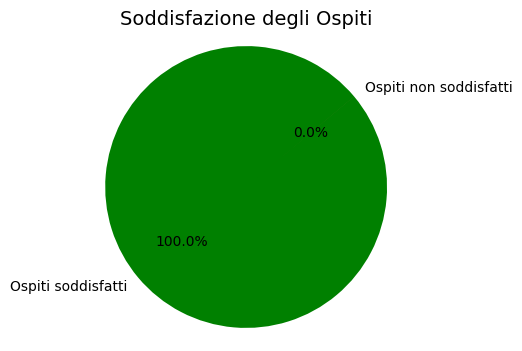

In [ ]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
sizes = [ospiti_soddisfatti, ospiti_allocati-ospiti_soddisfatti]
if sizes[1] == 0:
    sizes[1] = 0.1
colors = ['green', 'red']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
plt.title('Soddisfazione degli Ospiti', fontsize=14)
plt.axis('equal') 
plt.show() 
#I had to put the size of ospiti non soddisfatti as 0.1 because matplot wawsn't able to show the grafic 

# Graph of comparison:
**This last graphic shows which method has the best percentage of satisfaction in relation to the different methods required for allocating**

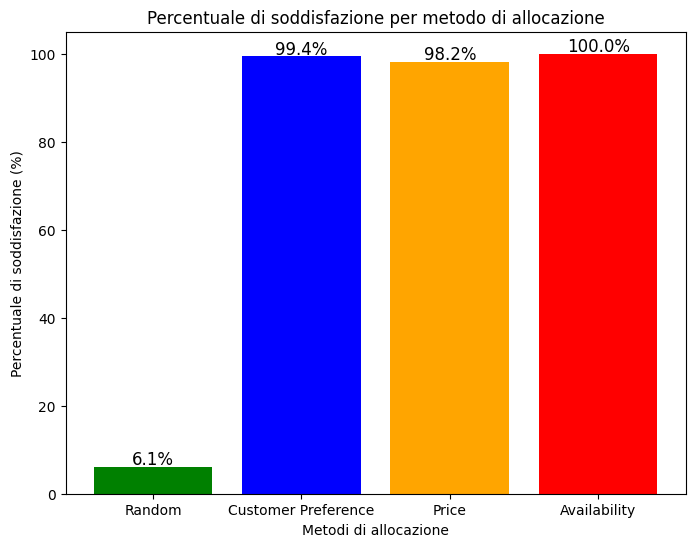

In [ ]:
metodi = ['Random', 'Customer Preference', 'Price', 'Availability']
ospiti_soddisfatti = [245, 3975, 3926, 4000]
ospiti_totali = 4000
percentuale_soddisfatti = [soddisfatti / ospiti_totali * 100 for soddisfatti in ospiti_soddisfatti]
plt.figure(figsize=(8, 6))
#the size of the figure
plt.bar(metodi, percentuale_soddisfatti, color=['green', 'blue', 'orange', 'red'])
#the bar has to has the name of metodi the % and the color that io chose 
plt.xlabel('Metodi di allocazione')
#name of x 
plt.ylabel('Percentuale di soddisfazione (%)')
#name of y
plt.title('Percentuale di soddisfazione per metodo di allocazione')
#title
for i in range(len(percentuale_soddisfatti)):
    plt.text(i, percentuale_soddisfatti[i] + 0.5, f'{percentuale_soddisfatti[i]:.1f}%', ha='center', fontsize=12)
# create a for loop to put in the right position i the %, the text has to be a little but higher than our value so we add 0.5 for putting the %
plt.show()


# Result: 
**We can observe that even if we are considering the preferences as our method of evaluation the better way to allocate guest in this case is using the 'Availability', which gives a 100% of satisfaction trough guests**